In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd

In [37]:
from DataManipulation import reshape_signal
from sklearn.model_selection import train_test_split
from scipy.signal import envelope
from sklearn.preprocessing import StandardScaler
from nptdms import TdmsFile

In [38]:
from Transformer_model import *

# LSTM encoder-decoder for seq-to-seq prediction

## Datageneration:

## preparing data

In [39]:
import os
N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
os.listdir(N_drive)

['Data_different_processparams_28_05_2025.tdms_index',
 'LongOU.csv',
 'Data_processes_2025_06_03.tdms',
 'LongOU.tdms_index',
 'LongOUJump.csv',
 'LongOUData.tdms_index',
 'Data_28_05_2025.tdms_index',
 'Data_different_processparams_28_05_2025.csv',
 'Data_different_processparams_28_05_2025.tdms',
 'Data_28_05_2025.tdms',
 'Data_diffent_process_params_2025_06_03.tdms',
 'Data_26_05_2025.csv',
 'LongOUData.tdms',
 'LongOU.tdms',
 'Data_28_05_2025.csv']

In [40]:
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
Christian_folder = os.path.join(os.path.dirname(Git_Folder))
Fig_folder = os.path.join(Git_Folder, 'Figures')

In [41]:
# Data = pd.read_csv(os.path.join(Christian_folder, 'Data.csv'))
tdmsdiff = 'Data_diffent_process_params_2025_06_03.tdms'
tdms = 'Data_processes_2025_06_03.tdms'
Data = TdmsFile.read(os.path.join(N_drive, tdms)).as_dataframe()

In [42]:
cols = list(Data.columns)
X_cols = [x for x in cols if x.endswith('ai0\'')]
Y_cols = [x for x in cols if x.endswith('ai1\'')]
type_data = [x.split('10s')[1].split('\'')[0] for x in X_cols]
type_data

['Bessel process',
 'Brownian bridge',
 'Brownian excursion',
 'Brownian meander process',
 'Brownian motion',
 'Symmetric Cauchy process',
 'Fractional Brownian motion process',
 'Gamma process',
 'Geometric Brownian motion process',
 'Inverse Gaussian process',
 'Mixed poisson process',
 'Poisson process',
 'Squared Bessel process',
 'Variance Gamma process',
 'Wiener process, or standard Brownian motion',
 'Generalized diffusion process',
 'Constant elasticity of variance process',
 'Cox-Ingersoll-Ross process',
 'Ornstein-Uhlenbeck process',
 'Vasicek process',
 'Gaussian noise process',
 'Fractional Gaussian noise process',
 'Blue noise',
 'Brownian (red) noise',
 'Colored noise processes',
 'Red (Brownian) noise',
 'Pink (flicker) noise',
 'Violet noise',
 'White noise']

In [43]:
# Data.dropna()
# Data['/\'SamplingRate50000Time100smultisine\'/\'Dev1/ai0\''].dropna()

In [44]:
# np.save(os.path.join(Git_Folder, "Python", "Transformer_models", f"{type_data[0]}_masodel.npy"), np.arange(1))

In [45]:
# type_data = ["LongOU"]
# i = 0

# dir = '/home/qopt/Christian/Bachelors-Project---Christian-Lorentsen/Python/Atomspc/Processed_data/'

# train_dataset, test_dataset, val_dataset = create_dataset(
#     seq_length = 5000, X = np.loadtxt(dir + "LongOUX.csv"), Y = np.loadtxt(dir + "LongOUY.csv")
# )
# # transformer = def_model(
# #     EMBED_DIM = 64,          
# #     INTERMEDIATE_DIM = 64, 
# #     NUM_HEADS = 4,         
# #     ENC_TIMESTEPS = 5000, 
# #     DEC_TIMESTEPS = 5000 
# # )
# history = train_model(
#     train_dataset = train_dataset,
#     val_dataset = val_dataset,
#     save_path = os.path.join(Git_Folder, "Python", "Transformer_models", f"{type_data[i]}_model.keras")
# )
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.title(f"Loss for {type_data[i]}")
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3.3764 - val_loss: 1.2466
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2031 - val_loss: 1.2636
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1970 - val_loss: 1.1993
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.1988 - val_loss: 1.1862
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2078 - val_loss: 1.1645
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1592 - val_loss: 1.1462
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1792 - val_loss: 1.2006
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1910 - val_loss: 1.1744
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1604 - val_loss: 1.1419
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1765 - val_loss: 1.1417
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1630 - val_loss: 1.1677
Epoch 12/100
700/700

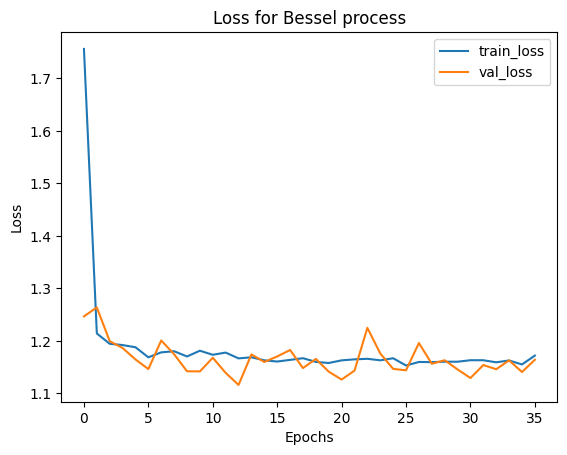

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.3800 - val_loss: 1.1698
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1715 - val_loss: 1.1707
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1516 - val_loss: 1.1668
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1261 - val_loss: 1.1372
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1270 - val_loss: 1.1584
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1152 - val_loss: 1.1714
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1427 - val_loss: 1.1282
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1248 - val_loss: 1.1228
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1115 - val_loss: 1.0964
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0881 - val_loss: 1.1414
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1234 - val_loss: 1.1434
Epoch 12/100
700/70

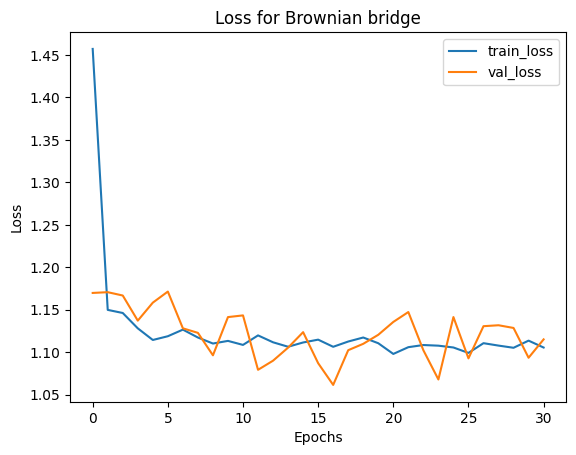

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.5001 - val_loss: 1.1011
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1024 - val_loss: 1.0937
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0893 - val_loss: 1.0714
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0764 - val_loss: 1.0779
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0773 - val_loss: 1.0694
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0778 - val_loss: 1.0414
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0707 - val_loss: 1.1015
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0702 - val_loss: 1.0708
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0507 - val_loss: 1.0509
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0621 - val_loss: 1.0681
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.0564 - val_loss: 1.0721
Epoch 12/100
700/700

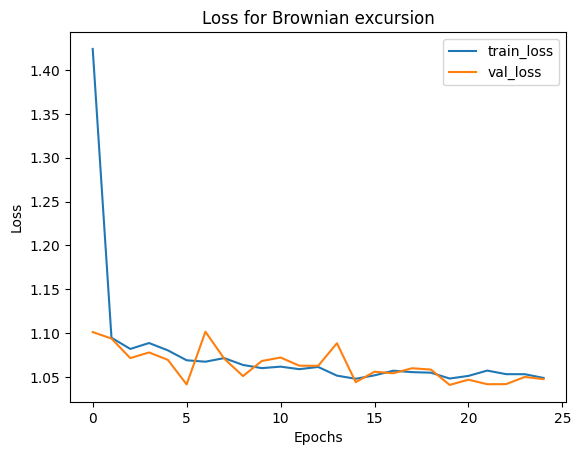

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.6358 - val_loss: 1.3047
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2647 - val_loss: 1.2030
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2283 - val_loss: 1.2212
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1877 - val_loss: 1.2364
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1967 - val_loss: 1.1629
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1747 - val_loss: 1.1898
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1755 - val_loss: 1.1979
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1973 - val_loss: 1.2229
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1926 - val_loss: 1.2148
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1925 - val_loss: 1.1834
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1672 - val_loss: 1.2180
Epoch 12/100
700/70

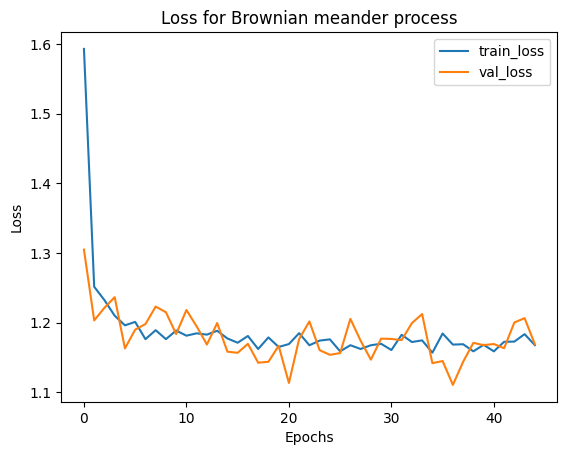

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.7371 - val_loss: 1.0282
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0940 - val_loss: 1.0093
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0567 - val_loss: 1.0710
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0371 - val_loss: 1.0235
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9976 - val_loss: 1.0549
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0076 - val_loss: 1.0177
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0023 - val_loss: 1.0503
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0047 - val_loss: 0.9618
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0172 - val_loss: 1.0469
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0008 - val_loss: 1.0418
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0326 - val_loss: 0.9919
Epoch 12/100
700/70

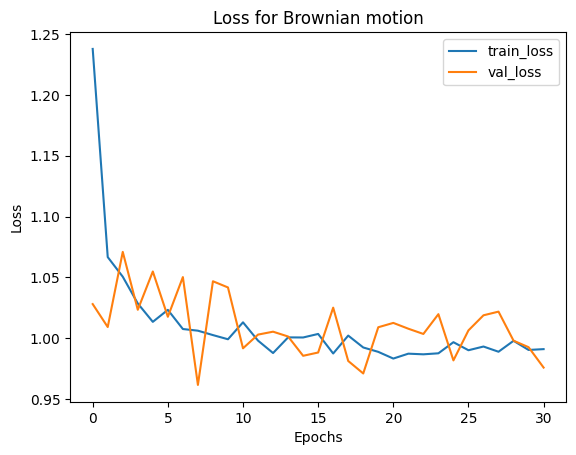

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.0871 - val_loss: 1.5210
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5151 - val_loss: 1.4410
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4523 - val_loss: 1.3997
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4148 - val_loss: 1.5237
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4239 - val_loss: 1.4376
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4538 - val_loss: 1.3727
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4180 - val_loss: 1.4724
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4127 - val_loss: 1.4323
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3602 - val_loss: 1.3682
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4201 - val_loss: 1.4442
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4328 - val_loss: 1.3720
Epoch 12/100
700/70

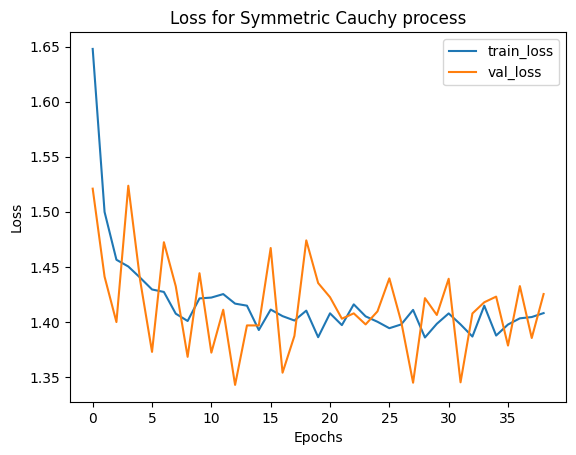

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.2690 - val_loss: 1.1724
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1448 - val_loss: 1.0965
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1151 - val_loss: 1.1598
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0716 - val_loss: 1.0920
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0856 - val_loss: 1.0803
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0690 - val_loss: 1.1043
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0837 - val_loss: 1.0479
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1035 - val_loss: 1.0821
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0746 - val_loss: 1.1097
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0685 - val_loss: 1.0773
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0922 - val_loss: 1.0893
Epoch 12/100
700/70

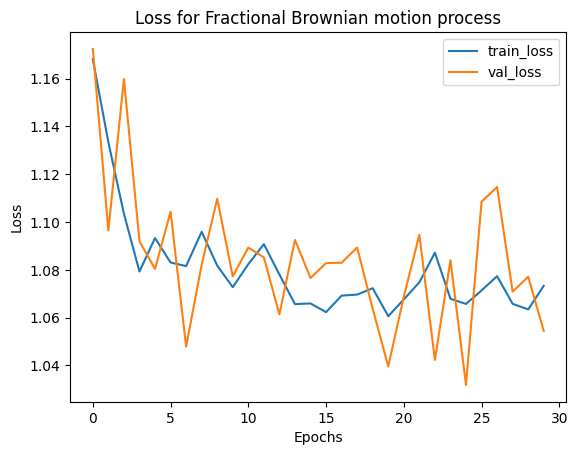

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.3983 - val_loss: 1.5615
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5967 - val_loss: 1.5830
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5544 - val_loss: 1.6269
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5343 - val_loss: 1.4982
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5499 - val_loss: 1.5075
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5413 - val_loss: 1.5061
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5252 - val_loss: 1.5903
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5428 - val_loss: 1.5593
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5470 - val_loss: 1.5018
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5478 - val_loss: 1.5092
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5265 - val_loss: 1.5250
Epoch 12/100
700/70

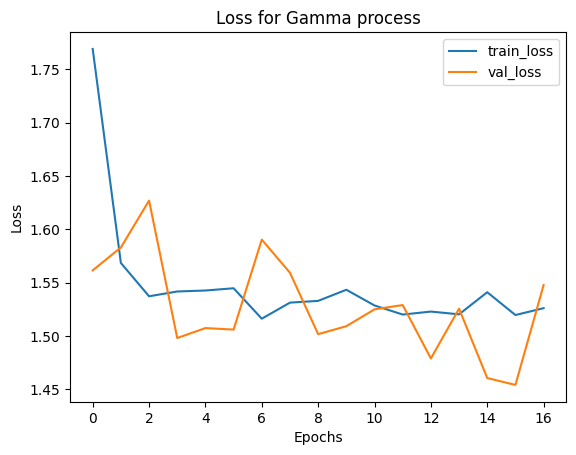

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 1.5808 - val_loss: 1.1195
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1383 - val_loss: 1.1734
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1181 - val_loss: 1.0917
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0679 - val_loss: 1.0630
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0819 - val_loss: 1.0831
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0866 - val_loss: 1.0843
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0821 - val_loss: 1.0826
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0973 - val_loss: 1.1109
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0949 - val_loss: 1.1099
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0772 - val_loss: 1.0717
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0659 - val_loss: 1.0684
Epoch 12/100
700/70

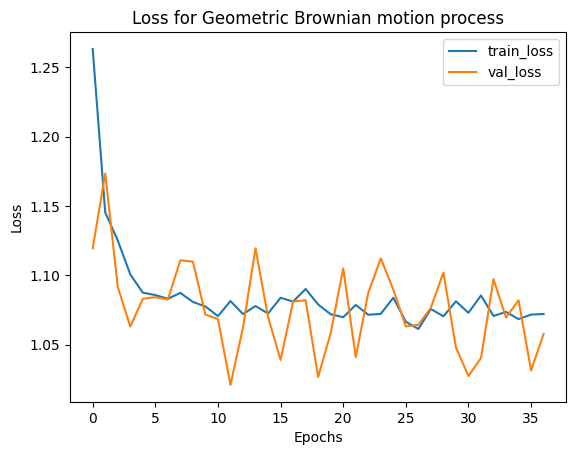

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.9841 - val_loss: 2.0082
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.0279 - val_loss: 2.0613
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.0153 - val_loss: 2.0066
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.0348 - val_loss: 1.9996
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.9900 - val_loss: 1.9544
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.0073 - val_loss: 1.9230
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.9531 - val_loss: 2.0064
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.9683 - val_loss: 1.8951
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9578 - val_loss: 2.0376
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9772 - val_loss: 1.9136
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.9663 - val_loss: 2.0227
Epoch 12/100
700/70

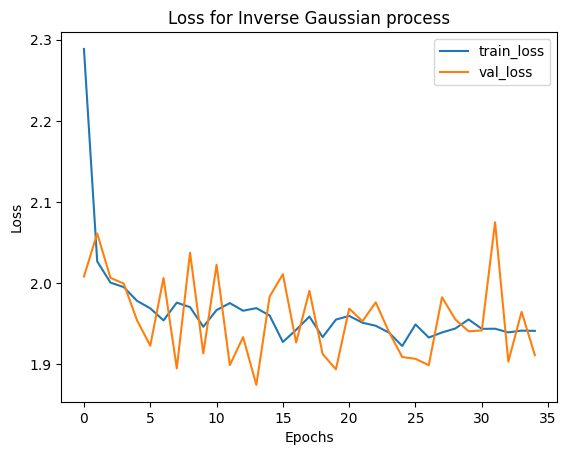

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3.5118 - val_loss: 1.5693
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5848 - val_loss: 1.6194
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5285 - val_loss: 1.5857
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5375 - val_loss: 1.5417
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5468 - val_loss: 1.5593
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5566 - val_loss: 1.5220
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5187 - val_loss: 1.5587
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5599 - val_loss: 1.5458
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5323 - val_loss: 1.5206
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5182 - val_loss: 1.5263
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5405 - val_loss: 1.5615
Epoch 12/100
700/70

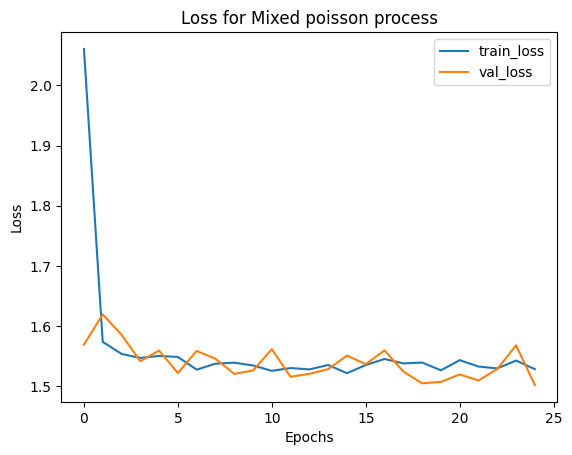

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.4221 - val_loss: 1.5525
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5584 - val_loss: 1.5090
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5488 - val_loss: 1.5725
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5560 - val_loss: 1.5083
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5490 - val_loss: 1.5184
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5231 - val_loss: 1.5595
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5200 - val_loss: 1.4906
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5168 - val_loss: 1.5047
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5181 - val_loss: 1.5496
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.5248 - val_loss: 1.5014
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5431 - val_loss: 1.5784
Epoch 12/100
700/70

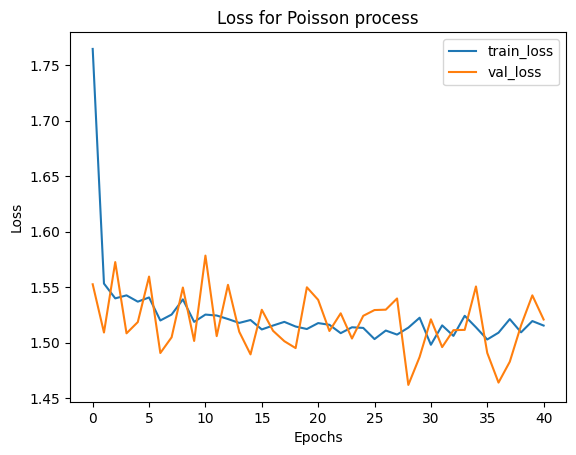

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2.8536 - val_loss: 1.7223
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5589 - val_loss: 1.4344
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4924 - val_loss: 1.4695
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4874 - val_loss: 1.4286
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4597 - val_loss: 1.4643
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4996 - val_loss: 1.4876
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4738 - val_loss: 1.4703
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4855 - val_loss: 1.4876
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.5013 - val_loss: 1.4267
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4294 - val_loss: 1.4652
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4962 - val_loss: 1.4386
Epoch 12/100
700/70

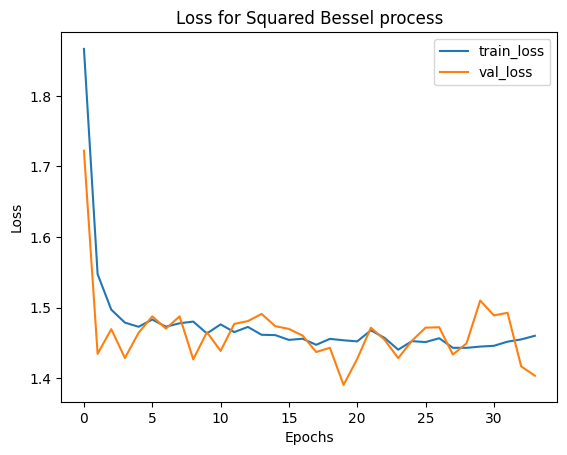

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.5007 - val_loss: 1.3851
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.4297 - val_loss: 1.4169
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4027 - val_loss: 1.3762
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3825 - val_loss: 1.3647
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4091 - val_loss: 1.4033
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3889 - val_loss: 1.3276
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3777 - val_loss: 1.3944
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3503 - val_loss: 1.4032
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.3703 - val_loss: 1.3259
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3884 - val_loss: 1.4295
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.3575 - val_loss: 1.4099
Epoch 12/100
700/70

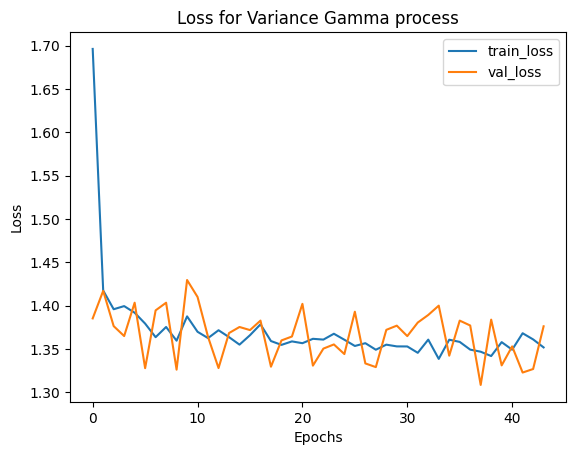

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.6938 - val_loss: 1.0222
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0158 - val_loss: 0.9708
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9927 - val_loss: 1.0000
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9935 - val_loss: 1.0031
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9841 - val_loss: 0.9811
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9693 - val_loss: 0.9601
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9842 - val_loss: 0.9839
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9893 - val_loss: 1.0119
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9528 - val_loss: 0.9749
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9877 - val_loss: 1.0080
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9840 - val_loss: 0.9670
Epoch 12/100
700/70

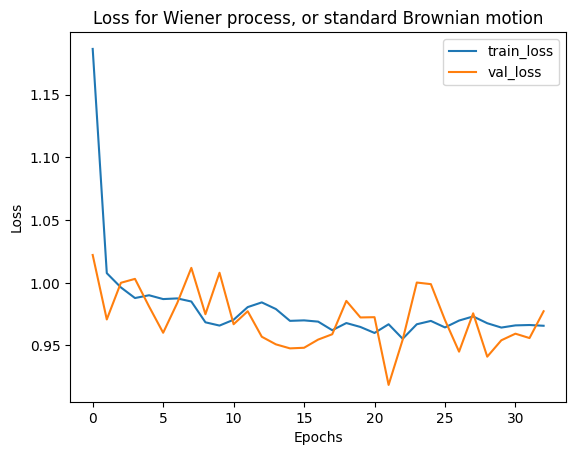

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.2537 - val_loss: 0.9121
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9663 - val_loss: 1.0037
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9537 - val_loss: 0.9587
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9376 - val_loss: 0.9175
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.9347 - val_loss: 0.9289
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9234 - val_loss: 0.9218
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9398 - val_loss: 0.9375
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9201 - val_loss: 0.9222
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9432 - val_loss: 0.9401
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.9252 - val_loss: 0.9200
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.9288 - val_loss: 0.9137
Epoch 12/100
700/70

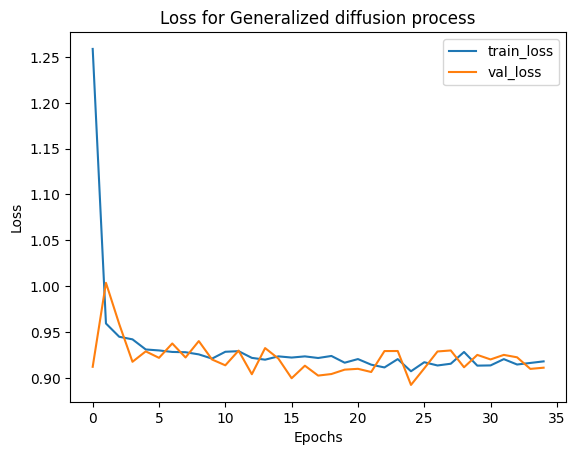

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1.6673 - val_loss: 1.3074
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2788 - val_loss: 1.2794
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2833 - val_loss: 1.3018
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2435 - val_loss: 1.2810
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2310 - val_loss: 1.3097
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2235 - val_loss: 1.2897
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2122 - val_loss: 1.1974
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2613 - val_loss: 1.2538
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2357 - val_loss: 1.2351
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2270 - val_loss: 1.2641
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2293 - val_loss: 1.2364
Epoch 12/100
700/70

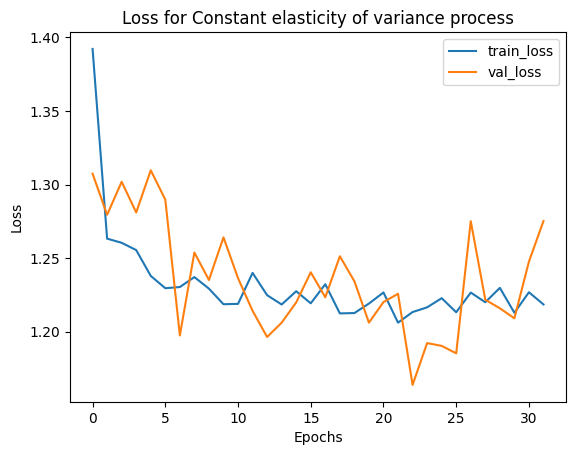

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.2806 - val_loss: 1.8518e-05
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.8326e-05 - val_loss: 1.2712e-05
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4384e-05 - val_loss: 7.0683e-06
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7.3434e-06 - val_loss: 5.4605e-06
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 5.6672e-05 - val_loss: 5.0666e-06
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 2.1168e-06 - val_loss: 7.5054e-06
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.2255e-04 - val_loss: 1.1551e-06
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9807e-05 - val_loss: 2.0485e-06
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 3.2707e-06 - val_loss: 4.4926e-05
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.9208e-04 - val_loss: 1.0145e-06
Epoch 11/100
700/700 ━━━━━━━━━━━━

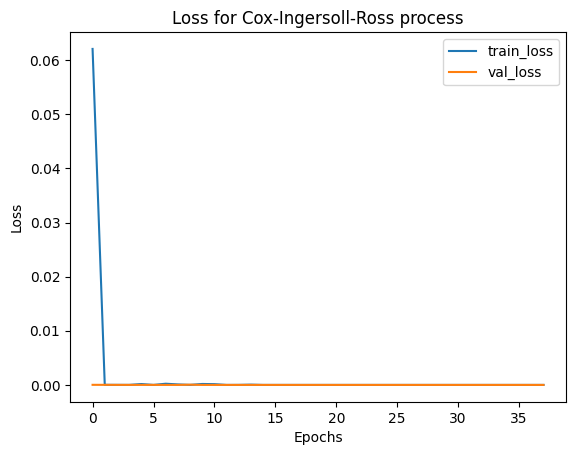

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.5781 - val_loss: 1.1085
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1426 - val_loss: 1.1180
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1298 - val_loss: 1.1267
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1122 - val_loss: 1.1021
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0986 - val_loss: 1.0948
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1020 - val_loss: 1.0773
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0992 - val_loss: 1.0998
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1104 - val_loss: 1.0858
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0954 - val_loss: 1.0775
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1121 - val_loss: 1.0903
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1263 - val_loss: 1.1067
Epoch 12/100
700/70

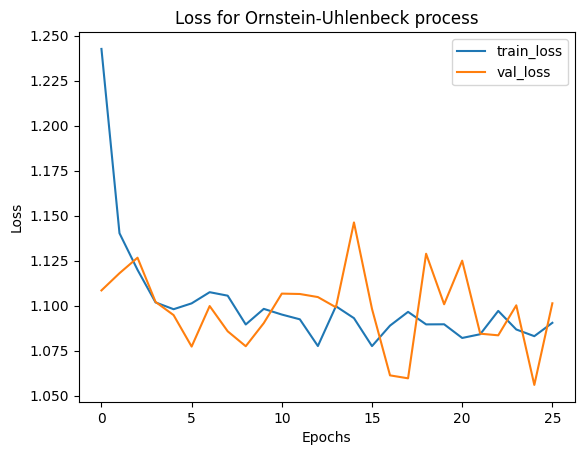

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.8351 - val_loss: 1.1023
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0820 - val_loss: 1.0712
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0615 - val_loss: 1.0504
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0296 - val_loss: 1.0360
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0481 - val_loss: 1.0652
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0328 - val_loss: 1.0590
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0262 - val_loss: 1.0525
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0259 - val_loss: 1.0389
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0260 - val_loss: 1.0074
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0328 - val_loss: 1.0297
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0254 - val_loss: 1.0039
Epoch 12/100
700/70

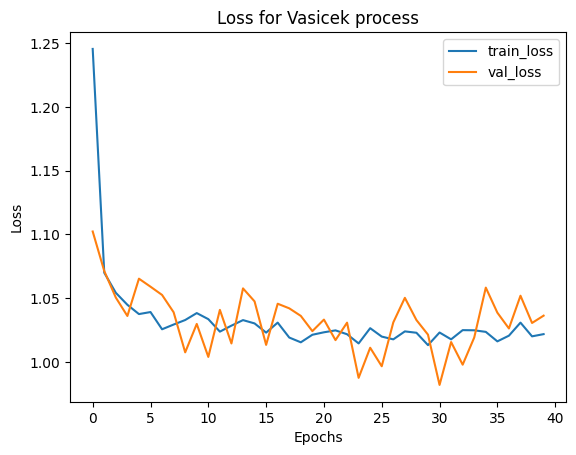

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 1.7674 - val_loss: 0.4668
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4435 - val_loss: 0.4365
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4373 - val_loss: 0.4341
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4351 - val_loss: 0.4234
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4361 - val_loss: 0.4325
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4358 - val_loss: 0.4375
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4359 - val_loss: 0.4364
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4300 - val_loss: 0.4340
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4391 - val_loss: 0.4398
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4301 - val_loss: 0.4253
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4300 - val_loss: 0.4307
Epoch 12/100
700/70

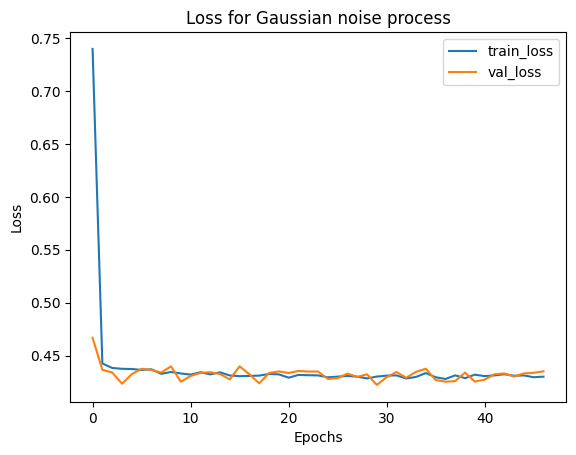

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.1375 - val_loss: 0.4537
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4530 - val_loss: 0.4655
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4558 - val_loss: 0.4733
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4550 - val_loss: 0.4484
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4504 - val_loss: 0.4606
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4502 - val_loss: 0.4624
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4513 - val_loss: 0.4460
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4507 - val_loss: 0.4486
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4486 - val_loss: 0.4432
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4507 - val_loss: 0.4525
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4464 - val_loss: 0.4456
Epoch 12/100
700/70

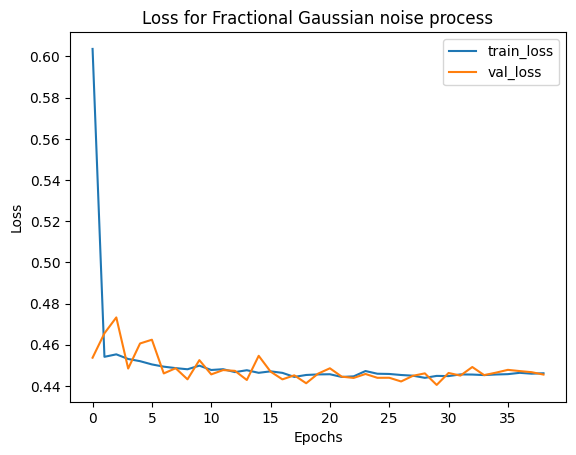

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.0479 - val_loss: 0.4478
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4547 - val_loss: 0.4388
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4549 - val_loss: 0.4375
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4453 - val_loss: 0.4737
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4492 - val_loss: 0.4482
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4477 - val_loss: 0.4534
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4474 - val_loss: 0.4457
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4425 - val_loss: 0.4552
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4459 - val_loss: 0.4395
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4438 - val_loss: 0.4411
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4465 - val_loss: 0.4412
Epoch 12/100
700/70

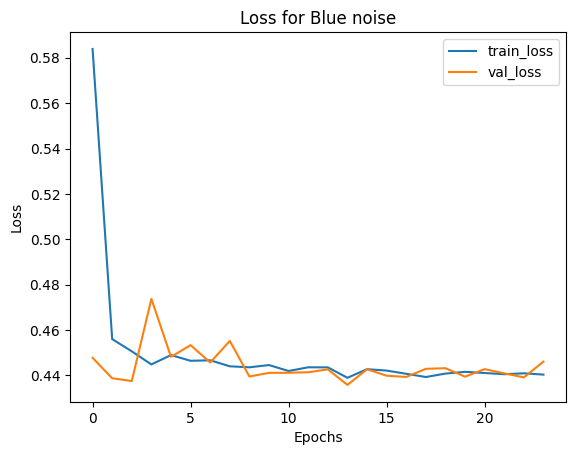

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.7045 - val_loss: 1.1694
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1476 - val_loss: 1.1437
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1608 - val_loss: 1.1135
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1447 - val_loss: 1.0916
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1183 - val_loss: 1.1181
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1309 - val_loss: 1.1122
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1276 - val_loss: 1.1166
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0899 - val_loss: 1.1425
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1318 - val_loss: 1.1648
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1231 - val_loss: 1.1137
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0923 - val_loss: 1.0962
Epoch 12/100
700/70

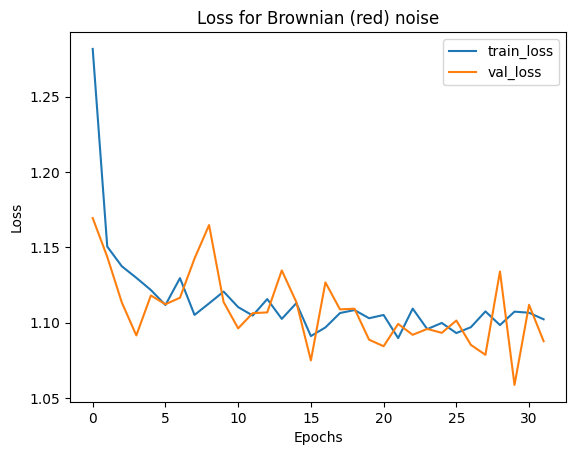

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.5682 - val_loss: 0.4558
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4628 - val_loss: 0.4492
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4612 - val_loss: 0.4504
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4591 - val_loss: 0.4488
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4636 - val_loss: 0.4601
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4597 - val_loss: 0.4624
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4551 - val_loss: 0.4602
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4558 - val_loss: 0.4475
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4565 - val_loss: 0.4784
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4598 - val_loss: 0.4638
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4567 - val_loss: 0.4498
Epoch 12/100
700/70

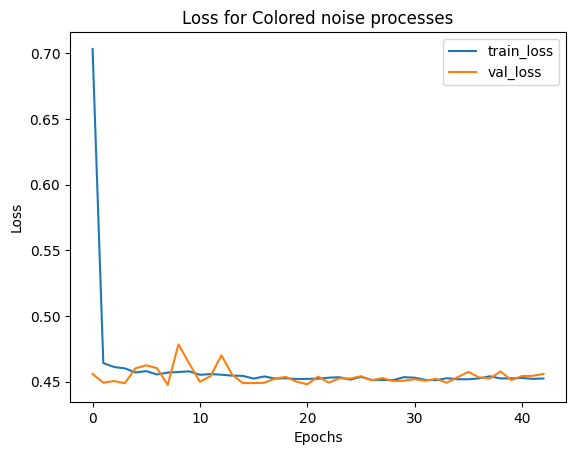

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1.5946 - val_loss: 1.1035
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1478 - val_loss: 1.0870
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1343 - val_loss: 1.1316
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1319 - val_loss: 1.1311
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.1178 - val_loss: 1.0819
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1051 - val_loss: 1.1205
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1402 - val_loss: 1.1005
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1029 - val_loss: 1.0399
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1123 - val_loss: 1.1252
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.0828 - val_loss: 1.1008
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1024 - val_loss: 1.1049
Epoch 12/100
700/70

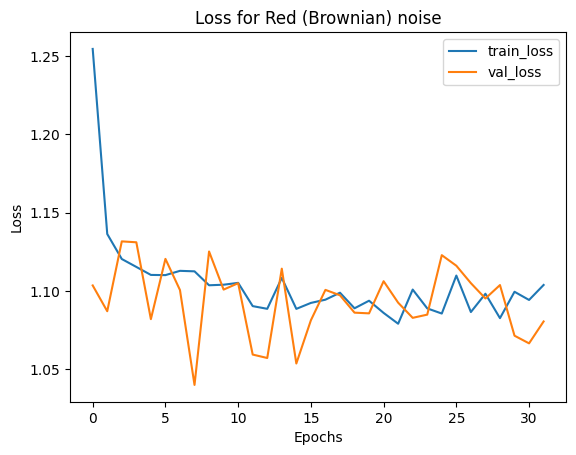

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1.0545 - val_loss: 0.5765
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5781 - val_loss: 0.5532
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5586 - val_loss: 0.5466
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5626 - val_loss: 0.5508
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5603 - val_loss: 0.5564
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5590 - val_loss: 0.5474
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5594 - val_loss: 0.5545
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5529 - val_loss: 0.5626
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5512 - val_loss: 0.5448
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5510 - val_loss: 0.5495
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.5474 - val_loss: 0.5509
Epoch 12/100
700/70

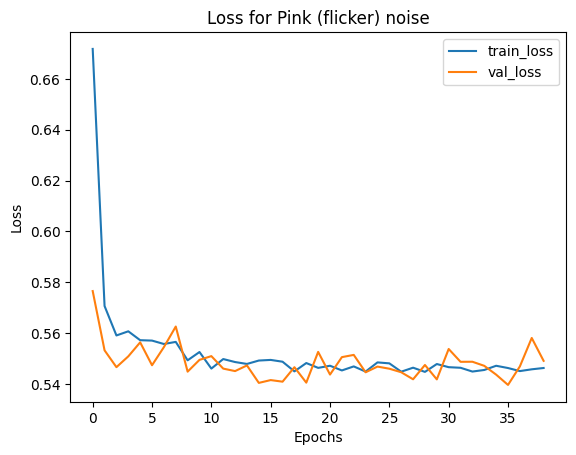

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.7676 - val_loss: 0.4081
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4178 - val_loss: 0.4176
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4141 - val_loss: 0.4149
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4181 - val_loss: 0.4092
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4138 - val_loss: 0.4117
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4094 - val_loss: 0.4242
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4145 - val_loss: 0.4175
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4126 - val_loss: 0.4147
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4111 - val_loss: 0.4106
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4157 - val_loss: 0.4194
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4113 - val_loss: 0.4091
Epoch 12/100
700/70

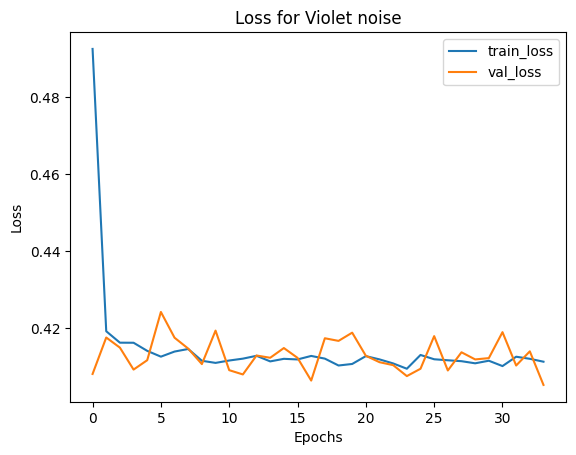

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.7876 - val_loss: 0.4317
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4422 - val_loss: 0.4368
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4377 - val_loss: 0.4337
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4344 - val_loss: 0.4347
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4375 - val_loss: 0.4283
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4335 - val_loss: 0.4373
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4355 - val_loss: 0.4325
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4337 - val_loss: 0.4264
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4299 - val_loss: 0.4321
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4328 - val_loss: 0.4330
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4351 - val_loss: 0.4347
Epoch 12/100
700/70

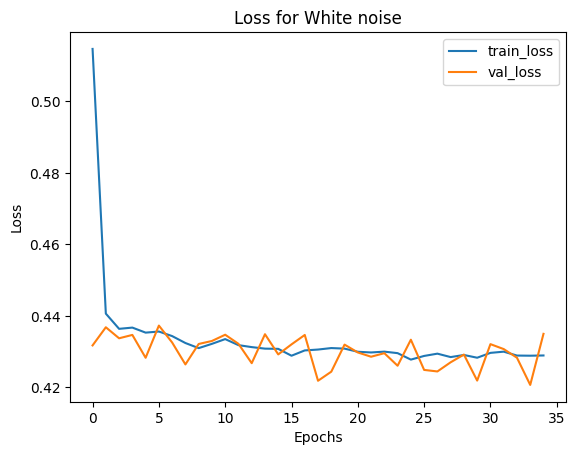

In [50]:
# Data[X_cols[0]].to_numpy()

for i in range(len(X_cols)):
    train_dataset, test_dataset, val_dataset = create_dataset(
        seq_length = 5000, X = Data[X_cols[i]].dropna().to_numpy(), Y = Data[Y_cols[i]].dropna().to_numpy()
    )
    # transformer = def_model(
    #     EMBED_DIM = 64,          
    #     INTERMEDIATE_DIM = 64, 
    #     NUM_HEADS = 4,         
    #     ENC_TIMESTEPS = 5000, 
    #     DEC_TIMESTEPS = 5000 
    # )
    history = train_model(
        train_dataset = train_dataset,
        val_dataset = val_dataset,
        save_path = os.path.join(Git_Folder, "Python", 'Atomspc', "Transformer_models", f"{type_data[i]}_sameparams_model.keras")
    )
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"Loss for {type_data[i]}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
stop here

In [51]:
os.listdir(os.path.join(Git_Folder, "Python", 'Atomspc', "Transformer_models"))
# /home/qopt/Christian/Bachelors-Project---Christian-Lorentsen/Python/Atomspc/Transformer_models

['Brownian (red) noise_sameparams_model.keras',
 'Brownian meander process_sameparams_model.keras',
 'Gamma process_sameparams_model.keras',
 'Wiener process, or standard Brownian motion_sameparams_model.keras',
 'Blue noise_sameparams_model.keras',
 'Brownian motion_sameparams_model.keras',
 'White noise_sameparams_model.keras',
 'Brownian excursion_sameparams_model.keras',
 'Squared Bessel process_sameparams_model.keras',
 'Brownian bridge_sameparams_model.keras',
 'Bessel process_sameparams_model.keras',
 'Geometric Brownian motion process_sameparams_model.keras',
 'Generalized diffusion process_sameparams_model.keras',
 'Inverse Gaussian process_sameparams_model.keras',
 'test.npy',
 'Constant elasticity of variance process_sameparams_model.keras',
 'Cox-Ingersoll-Ross process_sameparams_model.keras',
 'Vasicek process_sameparams_model.keras',
 'Ornstein-Uhlenbeck process_sameparams_model.keras',
 'Poisson process_sameparams_model.keras',
 'Colored noise processes_sameparams_model.

In [ ]:
Columns_Y = '/\'SamplingRate50000Time1000sLongOUProcess\'/\'Dev1/ai1\''
Columns_X = '/\'SamplingRate50000Time1000sLongOUProcess\'/\'Dev1/ai0\''

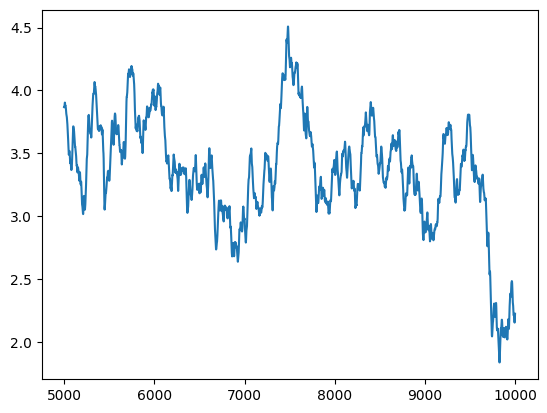

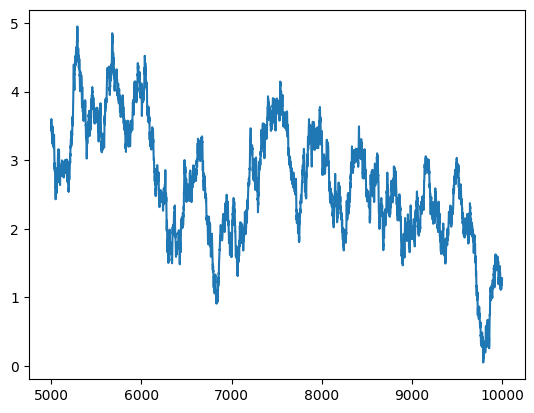

In [ ]:
plt.plot(Data[Columns_X][5000:10000])
plt.show()
plt.plot(Data[Columns_Y][5000:10000])
# int(len(Data.index)/5000)
# np.array(Data[Columns_Y])
# X = reshape_signal(np.array(Data[Columns_X]), int(len(Data.index)/5000))
# Y = reshape_signal(np.array(Data[Columns_Y]), int(len(Data.index)/5000))

In [ ]:
batch_size = 200  # Batch size for training.
epochs = 200  # Number of epochs to train for.
latent_dim = 150  # Latent dimensionality of the encoding space.
num_features = 1

X = np.array(Data[Columns_X])
Y = np.array(Data[Columns_Y])

mean_x = np.mean(X)
std_x = np.std(X)
X = (X-mean_x)/std_x

X = np.expand_dims(X, axis = 1)
Y = np.expand_dims(Y, axis = 1)


In [ ]:
seq_length = 5000

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(((X[int(0.8*len(X)):], tf.zeros_like(Y[int(0.8*len(X)):])), Y[int(0.8*len(X)):]))

dataset = dataset.batch(seq_length, drop_remainder=True)


I0000 00:00:1748186873.489342  187931 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13393 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(((X[:int(0.8*len(X))], tf.zeros_like(Y[:int(0.8*len(X))])), Y[:int(0.8*len(X))]))

test_dataset = test_dataset.batch(seq_length, drop_remainder=True)
# test_dataset = test_dataset.repeat()

## Setting up the model

In [ ]:
import keras_hub

/home/qopt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# # Create a single transformer decoder layer.
# decoder = keras_hub.layers.TransformerDecoder(
#     intermediate_dim=64, num_heads=8)

# # Create a simple model containing the decoder.
# decoder_input = tf.keras.Input(shape=(10, 64))
# encoder_input = tf.keras.Input(shape=(10, 64))
# output = decoder(decoder_input, encoder_input)
# model = tf.keras.Model(
#     inputs=(decoder_input, encoder_input),
#     outputs=output,
# )

# # Call decoder on the inputs.
# decoder_input_data = np.random.uniform(size=(2, 10, 64))
# encoder_input_data = np.random.uniform(size=(2, 10, 64))
# decoder_output = model((decoder_input_data, encoder_input_data))


In [ ]:
import keras
from keras_hub.layers import TransformerEncoder, TransformerDecoder

# Hyperparameters
EMBED_DIM = 4#64          # Projection dimension for time-series features
INTERMEDIATE_DIM = 64#128  # Transformer feedforward dimension
NUM_HEADS = 4#4           # Number of attention heads
ENC_TIMESTEPS = seq_length     # Input sequence length (adjust to your data)
DEC_TIMESTEPS = seq_length    # Output sequence length (adjust to your data)

# Custom positional encoding layer
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embedding = keras.layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
    
    def call(self, inputs):
        positions = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1)
        position_embeddings = self.position_embedding(positions)
        return inputs + position_embeddings

# Encoder Architecture
encoder_inputs = keras.Input(shape=(ENC_TIMESTEPS, 1))
x = keras.layers.Dense(EMBED_DIM)(encoder_inputs)  # Project to transformer dim
# x = PositionalEncoding(ENC_TIMESTEPS, EMBED_DIM)(x)
encoder_outputs = TransformerEncoder(
    intermediate_dim=INTERMEDIATE_DIM,
    num_heads=NUM_HEADS,
    activation = "gelu",
    layer_norm_epsilon = 1e-3
)(x)

# Decoder Architecture
decoder_inputs = keras.Input(shape=(DEC_TIMESTEPS, 1))
x = keras.layers.Dense(EMBED_DIM)(decoder_inputs)  # Project to transformer dim
# x = PositionalEncoding(DEC_TIMESTEPS, EMBED_DIM)(x)
decoder_outputs = TransformerDecoder(
    intermediate_dim=INTERMEDIATE_DIM,
    num_heads=NUM_HEADS,
    activation = "gelu",
    layer_norm_epsilon = 1e-3

)(
    decoder_sequence=x,
    encoder_sequence=encoder_outputs  # Cross-attention connection
)
decoder_outputs = keras.layers.Dense(1, activation="linear")(decoder_outputs)

# Full model
transformer = keras.Model(
    [encoder_inputs, decoder_inputs],
    decoder_outputs,
    name="time_series_transformer"
)


In [ ]:
print("Num GPUs Available (TF): ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available (TF):  1


## Training the model

In [ ]:
initial_learning_rate = 1e-5
warmup_steps = 1000
target_learning_rate = 1e-4
decay_steps = seq_length*3
lr_warmup_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=target_learning_rate,
    warmup_steps=warmup_steps
)



# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=X_train.shape[0]/batch_size,
#     decay_rate=0.9)


optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_warmup_decayed_fn)

In [ ]:
transformer.compile(
    optimizer=optimizer, loss="mse"
)
history = transformer.fit(
    dataset,
    batch_size=128,
    epochs=100,
    # validation_split=0.2,
    # validation_data=test_dataset
)
# Save model
transformer.save(os.path.join(Christian_folder, "Transformer_models", "Test_Transformer.keras"))

Epoch 1/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.2670
Epoch 2/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5885
Epoch 3/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5631
Epoch 4/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5391
Epoch 5/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5244
Epoch 6/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5155
Epoch 7/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5095
Epoch 8/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5054
Epoch 9/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5025
Epoch 10/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5003
Epoch 11/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4983
Epoch 12/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4962
Epoch 13/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4941
Epoch 14/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4918
Epoch 15/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 2

## Testing the model on unseen data

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


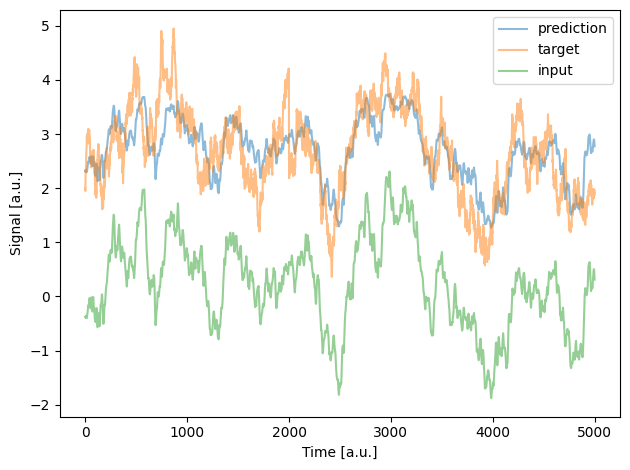

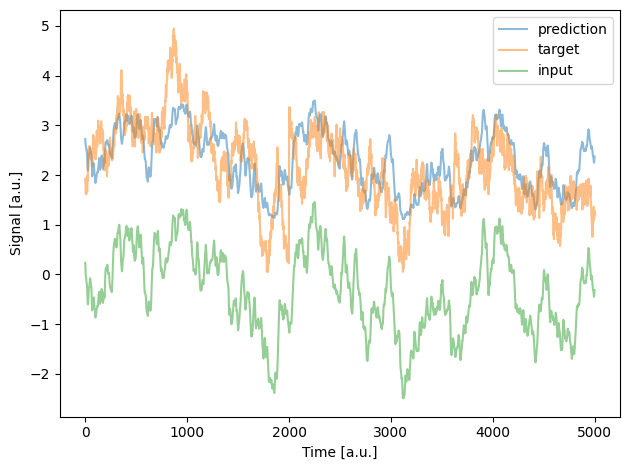

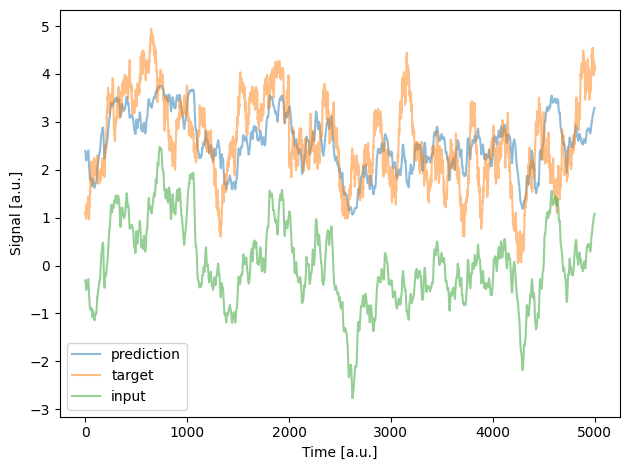

In [ ]:
# model = tf.keras.models.load_model("Transformer_test.keras", custom_objects={'PositionalEncoding': PositionalEncoding})
# model = tf.keras.models.load_model(os.path.join(Christian_folder, "Transformer_models", "Transformer_longOU.keras"))#, custom_objects={'PositionalEncoding': PositionalEncoding})

# Transformer_models/Transformer_longOU.keras
model = transformer

# model.predict([X_test, np.zeros_like(Y_test)]).shape
test_min = 100
test_max = 104
test_index = np.arange(test_min, test_max)

take = 3

# tests = test_dataset.take(take)
tests = dataset.take(take)
predictions = model.predict(tests)
# print(predictions[0][:, 0])

# t = np.linspace(0, 10, seq_le'ngth)*2*np.pi
# t_x = t[:int(seq_length*0.8)]
# t_y = t[int(seq_length*0.8):]'

# print(predictions.shape)
# for i in range(test_max-test_min):
#     plt.plot(X_test[test_index[i]][:, 0], label = 'input')
#     plt.show()
#     plt.plot(predictions[i][:, 0], label = 'prediction', alpha = 0.5)
#     plt.plot(Y_test[test_index[i]][:, 0], label = 'target', alpha = 0.5)
#     plt.legend()
#     plt.show()

# plt.plot()
# print(list(tests))

reshaped_pred = reshape_signal(predictions[:, 0], take)
# save_dir = "/Users/maimo/OneDrive/Bureau/Christian/Figs/"


for i in range(take):
    # print(i.shape)
    plt.plot(reshaped_pred[i], label = 'prediction', alpha = 0.5) #*1.2-3
    plt.plot(list(tests)[i][1][:, 0], label = 'target', alpha = 0.5)
    plt.plot(list(tests)[i][0][0][:, 0], label = 'input', alpha = 0.5)
    # print(list(tests)[i][0][0][:, 0])
    plt.legend()
    plt.xlabel("Time [a.u.]")
    plt.ylabel("Signal [a.u.]")
    plt.tight_layout()
    # print(list(tests)[i][1][:, 0])
    # if i == 0
    plt.savefig(os.path.join(Fig_folder, "LongOUProcess" + str(i) + ".svg"))
    plt.show()


In [ ]:
import os
# os.path.dirname(os.path.abspath(__file__))
# os.path.join()
# os.path.normpath(os.path.join(os.getcwd(), "Transformer_models/Transformer_longOU.keras"))
# os.path.join(os.getcwd(), '..', '..', 'Figures')
# os.getcwd()

In [ ]:
# print(os.chdir(os.path.join()))

In [ ]:
import numpy as np

np.save(, np.zeros(1))